In [1]:
import pandas as pd

from scipy.spatial.distance import pdist, squareform

from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv'
nba = pd.read_csv(data_url)
nba.head()

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,0.667,0.278,0.7,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [0]:
nba = nba.sample(500)
nba_subset = nba[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV']]

In [0]:
scaler = StandardScaler()
nba_scaled = scaler.fit_transform(nba_subset)

In [4]:
clst = AffinityPropagation(preference=-50)
clst.fit(nba_scaled)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=-50, verbose=False)

In [5]:
nba['label'] = clst.labels_
nba.iloc[clst.cluster_centers_indices_, :]

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,label
545,2018,Giannis Antetokounmpo,PF,23,MIL,75,75,36.7,9.9,18.7,0.529,0.6,1.9,0.307,9.3,16.8,0.554,0.545,6.5,8.5,0.760,2.1,8.0,10.0,4.8,1.5,1.4,3.0,3.1,26.9,0
865,2018,Khris Middleton,SF,26,MIL,82,82,36.4,7.2,15.5,0.466,1.8,5.0,0.359,5.5,10.5,0.517,0.524,3.9,4.4,0.884,0.5,4.7,5.2,4.0,1.5,0.3,2.3,3.3,20.1,1
845,2018,Frank Mason,PG,23,SAC,52,2,18.9,2.8,7.3,0.379,0.6,1.7,0.360,2.2,5.7,0.384,0.420,1.8,2.2,0.817,0.6,1.9,2.5,2.8,0.7,0.2,1.3,1.4,7.9,2
531,2018,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,0.356,1.5,4.2,0.349,0.4,1.0,0.384,0.496,0.7,0.9,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,3
928,2018,Elfrid Payton,PG,23,TOT,63,63,28.7,5.2,10.6,0.493,0.5,1.5,0.326,4.7,9.1,0.520,0.516,1.7,2.7,0.649,1.0,3.3,4.3,6.2,1.3,0.3,2.7,2.3,12.7,4
630,2018,John Collins,PF,20,ATL,74,26,24.1,4.2,7.4,0.576,0.2,0.6,0.340,4.0,6.7,0.598,0.591,1.8,2.5,0.715,2.4,4.9,7.3,1.3,0.6,1.1,1.4,2.9,10.5,5
1949,2016,James Michael McAdoo,PF,23,GSW,41,1,6.4,1.1,2.0,0.536,0.0,0.0,0.500,1.1,2.0,0.537,0.542,0.6,1.2,0.531,0.7,0.7,1.4,0.4,0.2,0.2,0.4,1.0,2.9,6
2007,2016,Jabari Parker,PF,20,MIL,76,72,31.7,5.8,11.8,0.493,0.1,0.5,0.257,5.7,11.4,0.502,0.498,2.3,3.0,0.768,1.6,3.6,5.2,1.7,0.9,0.4,1.5,2.0,14.1,7


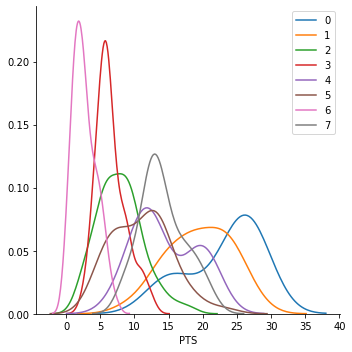

In [13]:
grid = sns.FacetGrid(nba, hue='label', height=5)
grid.map(sns.distplot, 'PTS', hist=False)
plt.legend()
plt.show()